## 1. 数据预处理

In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1 读取数据

In [2]:
d1 = pd.read_csv('../dataset/data-test.csv', header=None)
d1.head()
d2 = pd.read_csv('../dataset/studentscores-test.csv', header=None)
d2.head()

,0,1,2,3
0,France,France,Spain,Germany
1,Spain,Germany,Spain,Germany
2,Germany,Spain,Germany,France
3,Country,Age,Salary,Purchased
4,Spain,Germany,France,Spain


,0,1
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 1.2. 数据拆分为测试集和训练集

- `random_state`: 随机种子数，是一组随机数的编号，相同编号随机拆分的方式相同。整数取值范围$[0,\ 2^{32}]$
- 若为0或者为空(None), 则每次随机划分结果不同；若为其他则划分方式相同; 

In [3]:
dataset = pd.read_csv('../dataset/studentscores.csv')
dataset.head()
X = dataset.iloc[ :, : 1 ].values
Y = dataset.iloc[ :, 1 ].values
X[:5]
Y[:5]
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)  
len(X_train)
len(X_test)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

array([21, 47, 27, 75, 30], dtype=int64)

21

7

## 2. 使用简单线性回归训练模型

### 模型训练
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

观测值: $(Hours,Score) = \{(x_i, y_i), i=1,2,...,n\}$, 确定函数 $y=b + k * x$， 

使得$\sum{(y_i-y_i')^2}$的值最小，其中, $y_i'=b + k * x_i$.

相关系数$R^2$为 $R^2 = 1 - \frac{u}{v}$, 其中，

$u = \sum(y_i - y_i')^2$, $v = \sum(y_i - \bar{y})^2$, $\bar{y} = \frac{\sum{y_i}}{n}$

> The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) \** 2).sum() 
> and v is the total sum of squares ((y_true - y_true.mean()) \** 2).sum()

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)
"模型函数的斜率k:", regressor.coef_
"模型函数的截距b:", regressor.intercept_ 
"相关系数R^2", regressor.score(X_train, Y_train)

('模型函数的斜率k:', array([5.09237382]))

('模型函数的截距b:', 35.744058960718256)

('相关系数R^2', 0.24491942030429567)

### 结果预测

In [5]:
Y_pred = regressor.predict(X_test)
X_test
Y_pred

array([[3.2],
       [3.8],
       [1.1],
       [1.9],
       [1.5],
       [5.9],
       [7.8]])

array([52.0396552 , 55.09507949, 41.34567017, 45.41956923, 43.3826197 ,
       65.78906452, 75.46457479])

### 结果可视化

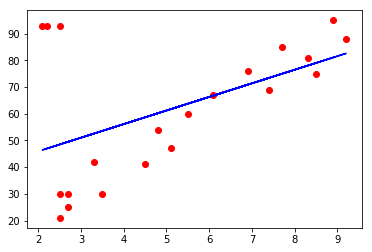

In [6]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')
plt.show()